5 red
6 red


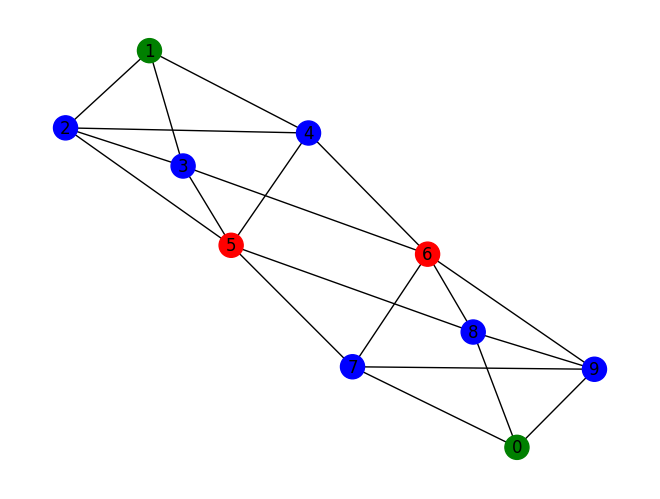

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def uncover_neighbours(G, colors, g):
  r = False
  node = G[g]
  for i in node:
    if colors[i] == 'black':
      r = True
  return r

yR = 0
N = 10
graph = {
    0: [7, 8, 9],
    1: [2, 3, 4],
    2: [1, 3, 4, 5],
    3: [1, 2, 5, 6],
    4: [1, 2, 5, 6],
    5: [2, 3, 4, 7, 8],
    6: [3, 4, 7,  9],
    7: [ 5, 6, 9, 0],
    8: [5, 6, 9, 0],
    9: [6, 7, 0]
}
colors = ['black']*N
G = nx.Graph(graph)
degr = sorted(G.degree, key=lambda x: x[1], reverse=True)
for i in degr:
  if colors[i[0]] == 'black':
    if uncover_neighbours(G, colors, i[0]):
      print(i[0], 'red')
      colors[i[0]] = 'red'
      for g in G[i[0]]:
        if colors[g] == 'black':
          colors[g] = 'blue'
    else:
      if colors[i[0]] == 'black':
        colors[i[0]] = 'green'

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()

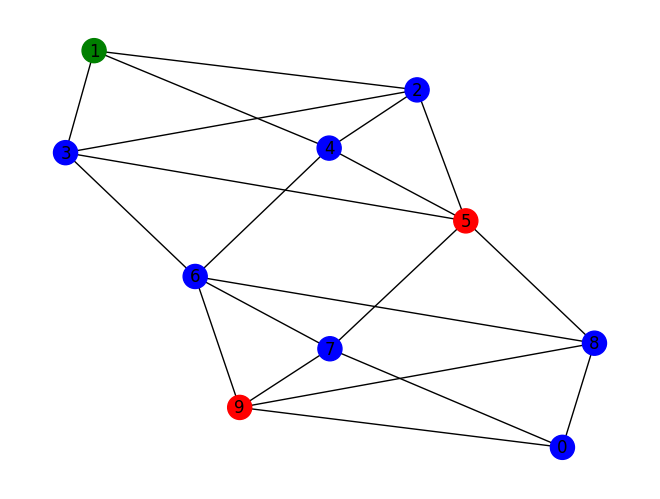

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def uncover_neighbours(G, colors, g):
  r = 0
  node = G[g]
  for i in node:
    if colors[i] == 'black':
      r = r + 1
  return r

yR = 0
N = 10
graph = {
    0: [7, 8, 9],
    1: [2, 3, 4],
    2: [1, 3, 4, 5],
    3: [1, 2, 5, 6],
    4: [1, 2, 5, 6],
    5: [2, 3, 4, 7, 8],
    6: [3, 4, 7,  9],
    7: [ 5, 6, 9, 0],
    8: [5, 6, 9, 0],
    9: [6, 7, 0]
}
colors = ['black']*N
G = nx.Graph(graph)
while('black' in colors):
  max_node = -1
  max_count = -1
  for i in G:
    if colors[i] == 'black':
      if uncover_neighbours(G, colors, i) > max_count:
        max_node = i
        max_count = uncover_neighbours(G, colors, i)
  if max_count > 0:
    colors[max_node] = 'red'
    nodes = G[max_node]
    for i in nodes:
      if colors[i] == 'black':
        colors[i] = 'blue'
  else:
    colors[max_node] = 'green'

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()

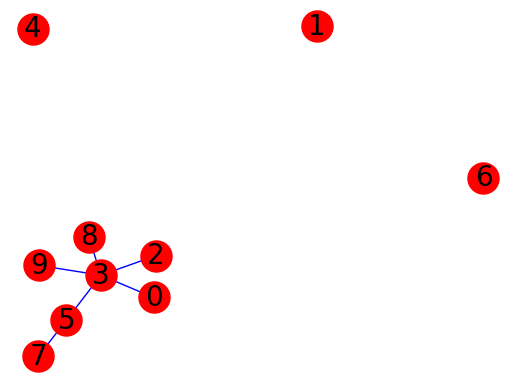

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем связный граф с N вершинами
N = 10
G = nx.gnp_random_graph(N, 0.1)

# Визуализируем граф
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='r', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis('off')
plt.show()

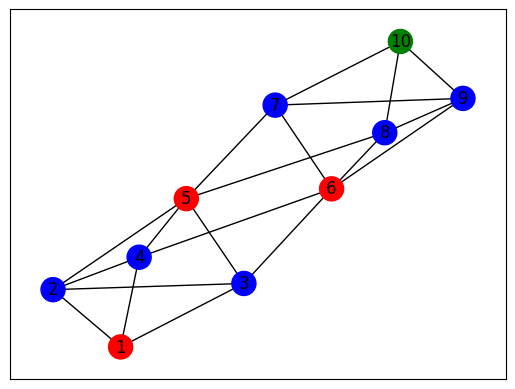

yR =  7


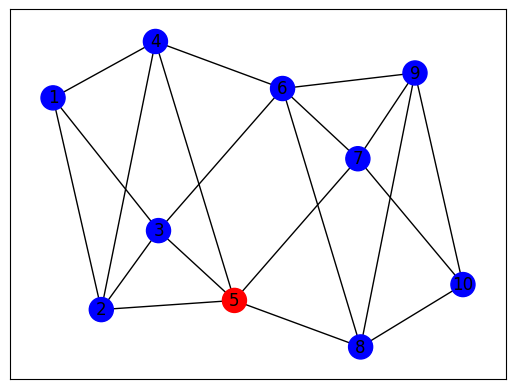

yRn =  2


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def uncovered_neighbors(node):
    for neighbor in graph[node]:
        if colors[neighbor] == 'black':
            return True
    return False

yR = 0
yRn = 0
N = 10
graph = {
    1: [2, 3, 4],
    2: [1, 3, 4, 5],
    3: [1, 2, 5, 6],
    4: [1, 2, 5, 6],
    5: [2, 3, 4, 7, 8],
    6: [3, 4, 7,  9],
    7: [ 5, 6, 9, 10],
    8: [5, 6, 9, 10],
    9: [6, 7, 10],
    10: [7, 8, 9]
}

G = nx.Graph(graph)
G_center = nx.Graph(graph)

colors = {i: 'black' for i in range(1, N + 1)}
colors_center = {i: 'blue' for i in range(1, N + 1)}

for node in range(1, N + 1):
    if colors[node] == 'black':
        if uncovered_neighbors(node):
            yR = yR + 2
            colors[node] = 'red'
            for neighbor in graph[node]:
              colors[neighbor] ='blue'
        else:
            yR = yR + 1
            colors[node] = 'green'

colors_center[nx.center(G_center)[0]] = 'red'
yRn = nx.radius(G_center)+1

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=[colors[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()
print('yR = ', yR)
pos = nx.spring_layout(G_center)
nx.draw_networkx_nodes(G_center, pos, node_color=[colors_center[node] for node in G.nodes()])
plt.show()
print('yRn = ', yRn)

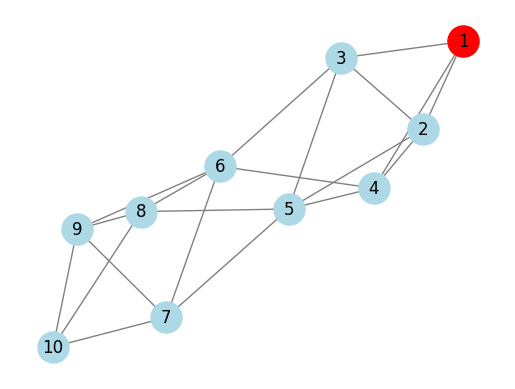

Результат:
Доминирующие вершины: {1}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def roman_dominance(graph):
    dominance_graph = nx.Graph()
    dominance_graph.add_nodes_from(graph.nodes)
    dominance_graph.add_edges_from(graph.edges)

    uncovered_nodes = set(graph.nodes)

    while uncovered_nodes:
        centralities = nx.degree_centrality(dominance_graph)
        max_cent = max(centralities, key=centralities.get)
        dominant_node = max_cent

        dominant_nodes = {dominant_node}
        uncovered_nodes -= {dominant_node} | set(dominance_graph.neighbors(dominant_node))
        dominance_graph.remove_nodes_from([dominant_node] + list(dominance_graph.neighbors(dominant_node)))

    return dominant_nodes

# Создаем граф
graph = {
    1: [2, 3, 4],
    2: [1, 3, 4, 5],
    3: [1, 2, 5, 6],
    4: [1, 2, 5, 6],
    5: [2, 3, 4, 7, 8],
    6: [3, 4, 7,  9],
    7: [ 5, 6, 9, 10],
    8: [5, 6, 9, 10],
    9: [6, 7, 10],
    10: [7, 8, 9]
}
G = nx.Graph(graph)

# Решаем задачу римского доминирования
dominant_set = roman_dominance(G)

# Отрисовка графа
pos = nx.spring_layout(G)  # Позиции вершин для отображения
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_color='black')
nx.draw_networkx_nodes(G, pos, nodelist=dominant_set, node_color='red', node_size=500)
plt.axis('off')
plt.show()

print("Результат:")
print("Доминирующие вершины:", dominant_set)

1
3
0:00:00.000132 3
[{0: 2}, {1: 2}, {2: 2}]
2
6
0:00:00.000556 30
[{0: 3}, {0: 2, 5: 1}, {1: 3}, {1: 2, 4: 1}, {2: 3}, {2: 2, 3: 1}, {3: 3}, {4: 3}, {5: 3}]
2
15
0:00:00.003377 210
[{0: 3}, {1: 3}, {2: 3}]
3
42
0:00:00.123838 2583
[{0: 4}, {1: 4}, {2: 4}, {3: 4}, {4: 4}, {5: 4}, {6: 4}, {7: 4}, {10: 4}, {15: 4}, {16: 4}, {23: 4}]
3
123
0:00:01.520686 22509
[{0: 4}, {1: 4}, {2: 4}]
4
366
0:01:48.369659 267180
[{0: 5}, {1: 5}, {2: 5}, {3: 5}, {4: 5}, {5: 5}, {6: 5}, {7: 5}, {10: 5}, {15: 5}, {16: 5}, {23: 5}, {42: 5}, {43: 5}, {58: 5}, {123: 5}, {124: 5}, {155: 5}]


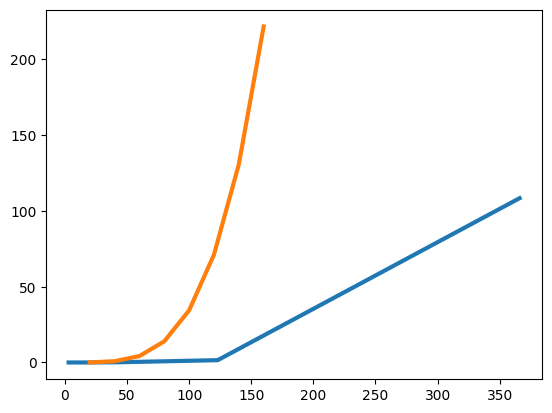

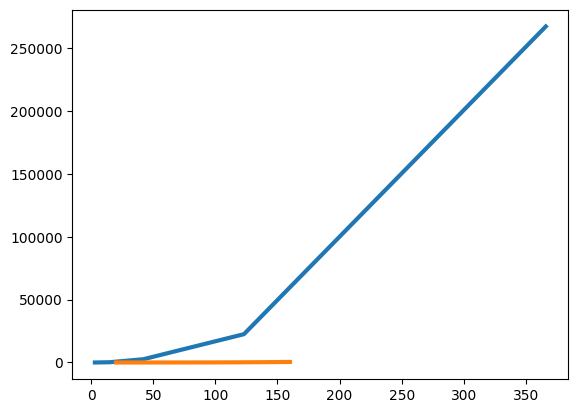

In [ ]:
from itertools import *
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

num = 10
rt = []
rn = []
nr = []
for l in range(1, 7):
  #G = nx.ladder_graph(30)
  G = nx.dorogovtsev_goltsev_mendes_graph(l)
  #G = nx.circular_ladder_graph(30)
  radius = nx.radius(G)
  print(radius)
  center = nx.center(G)

  N = len(G)
  nr.append(N)
  print(N)
  letters = list(range(0, N))

  start_time = datetime.now()
  r = 0
  res = []

  for i in range(len(G)):
    for j in range(i, len(G)):
      if i == j:
        colors = ['blue']*N
        G_tmp = nx.bfs_tree(G, source=i, depth_limit = radius)
        colors[i] = 'red'
        for g in G_tmp:
          if colors[g] == 'blue':
            colors[g] = 'green'
        if 'blue' not in colors:
          res.append(dict([(i, radius + 1)]))
          #pos = nx.spring_layout(G)
          #nx.draw(G, pos, node_color=colors, with_labels=True)
          #plt.title(dict([(i , radius + 1)]))
          #plt.show()

      else:
        for k in range(1, radius + 1):
          colors = ['blue']*N
          r = r + 1
          if k>1:
            G_tmp1 = nx.bfs_tree(G, source=i, depth_limit=k-1)
            colors[i] = 'red'
            for g in G_tmp1:
              if colors[g] == 'blue':
                colors[g] = 'green'
          else:
            G_tmp1 = i
            colors[i] = 'red'

          if radius - k + 1 > 1:
            G_tmp2 = nx.bfs_tree(G, source=j, depth_limit = radius - k)
            colors[j] = 'red'
            for g in G_tmp2:
              if colors[g] == 'blue':
                colors[g] = 'green'
          else:
            G_tmp2 = i
            colors[j] = 'red'

          if 'blue' not in colors:
            res.append(dict([(i, k), (j, radius-k+1)]))
            #pos = nx.spring_layout(G)
            #nx.draw(G, pos, node_color=colors, with_labels=True)
            #plt.title(dict([(i, k), (j, radius-k+1)]))
            #plt.show()
  end = datetime.now()
  rt.append(float(end.timestamp()-start_time.timestamp()))
  rn.append(r)
  print(datetime.now()-start_time, r)
  print(res)

n10 = [20,40,60,80,100,120,140,160]
r30 = [1140, 8580, 28320, 66360, 128700, 221340,350280,521520]
n30 = [0.055, 0.83, 04.24, 13.97, 34.42, 71.14,130.72, 221.65]
p30 = [0.09, 1.55, 8.40, 26, 67.03, 133.32, 244.85, 420.9]
plt.plot(nr, rt, n10, n30,  linewidth=3.0)
plt.show()
plt.plot(nr, rn,n10, p30,  linewidth=3.0)
plt.show()

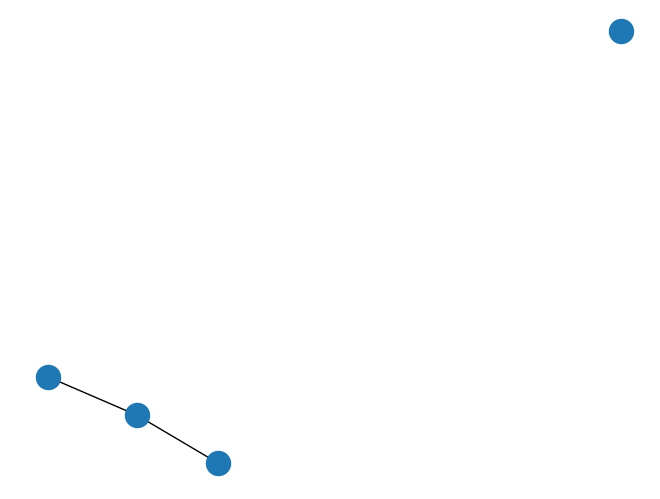

In [ ]:
G = nx.graph_atlas(10)
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()